In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

For this assignment we will be using the fashion MNIST dataset.
As stated in the original [Github repository](https://github.com/zalandoresearch/fashion-mnist):
>Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

One of the easiest ways to load the dataset is by using tf.keras. Our dataset will consist of 3 dimensional numpy arrays with shapes : (samples, rows, columns). In order to use the data with libraries that require 2 dimensional arrays with shapes (samples, features) we will reshape each sample by flattening each image. Instead of having an array of shape (28, 28) for each image we will now have a vector of length 784 (28x28=784).

Note that below we only load the trainigng samples which we will use to perform dimensionality reduction.

In [2]:
(X_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


We keep the class names in the following list and we also create another list named `y_train_labels` which contains the the labels for each sample. We will use these both as labels for our plots.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_dict = dict(enumerate(class_names))

y_train_labels = np.vectorize(class_dict.get)(y_train)

We also define a function that will print a grid 5x5 of photos from the provided subset.

In [9]:
def plot_images(X, y):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i]])
    plt.show()

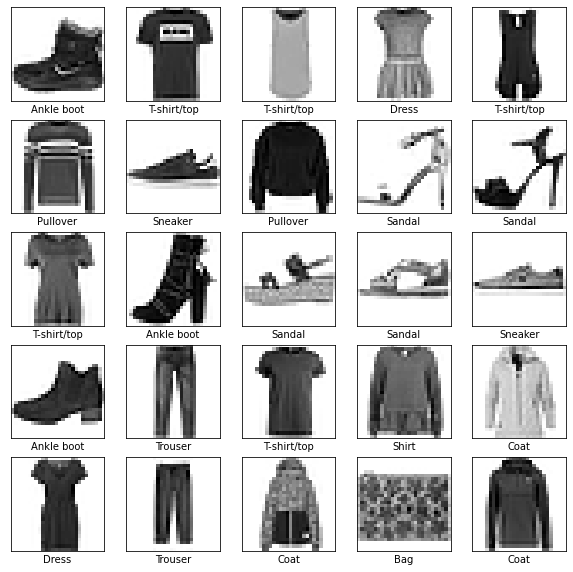

In [10]:
plot_images(X_train, y_train)

We can use images in python (and other programming languages of course) as arrays/matrices. In python a byte image of 28x28 will be represented by a numpy array of shape (28,28) with each pixel/cell having a value in the range [0, 255] with 0 being black and 255 white. The values between represent shades of gray. On the same note if we had an RBG image with colors, the same array would be a 3-dimensional numpy array of shape (28, 28, 3) where each pixel is represented by three values in the range [0, 255] for each color (Red, Green, Blue).

We have seen feature scaling in the past. In order to be able to use our images with methods that are scale sensitive we divide all values by 255, thus bringing everything in the [0, 1] range. 

In [11]:
X_train = X_train/255

Scikit learn methods require 2-dimensional datasets (number_of_rows, number_of_features). We tranform each image from 28 x 28 pixels to a flat array of 784 length. To find the number of features we multiply the last two dimensions.

In [12]:
number_of_features = X_train.shape[1] * X_train.shape[2]
X_train_reshaped = X_train.reshape(-1, number_of_features)

When we plot images we will require to reshape them back to 28x28 images.

Also we select just a subset (1000) of our data samples and perform our exercises on this one in order to speed up execution, as our purpose is to showcase this. For more accurate/better results, we would need to do this on the whole dataset.

In [13]:
X_train_sub = X_train_reshaped[:1000]
y_train_labels_sub = y_train_labels[:1000]

In [19]:
from sklearn.decomposition import PCA
# Run PCA and keep the first two components
pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(X_train_sub), columns=['0', '1'])
pca_components['target'] = y_train_labels_sub

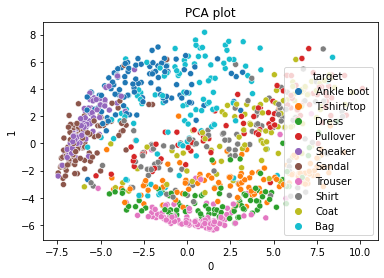

In [22]:
# Plot reduced data in two dimensions using seaborn scatterplot
sns.scatterplot(x='0', y='1', hue='target', data=pca_components)
plt.title('PCA plot')
plt.show()

We can now inverse transform the reduced data. This means that we transform it back to the original space by using only the number of components we run PCA on (2 in our case). This will let us understand what dimensionality reduction really means. We keep a subset of these latent features that maximize the explained variance. With these plots we get an idea of what "maximum explained variance" actually means. We get images that vaguely look like our initial articles, but without the details. 

In [25]:
inversed = pca.inverse_transform(pca.fit_transform(X_train_sub)).reshape(-1, 28, 28)

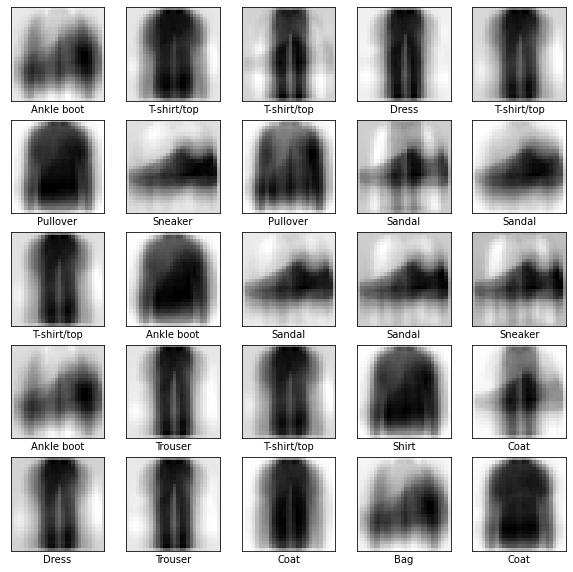

In [26]:
plot_images(inversed, y_train)

Create t-SNE models with different amounts of perplexity (try between single and triple digits?) and plot their reduced features.

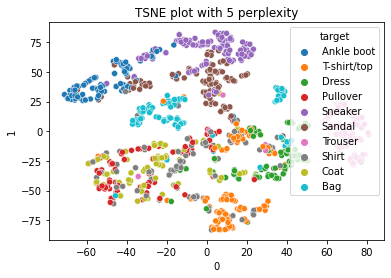

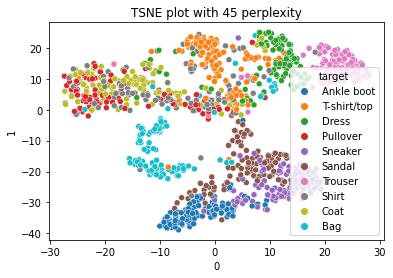

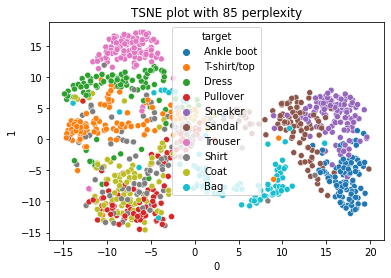

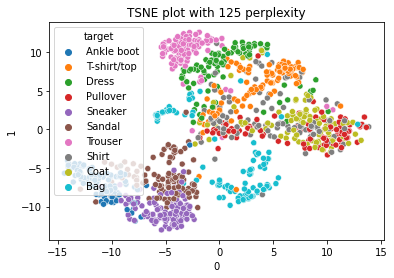

In [34]:
from sklearn.manifold import TSNE

for p in range(5, 156, 40):
    # Run TSNE for each of these perplexity values and transform X_train_sub
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_components = pd.DataFrame(tsne.fit_transform(X_train_sub), columns=['0', '1'])
    tsne_components['target'] = y_train_labels_sub

    # Plot reduced features in two dimensions using seaborn scatterplot
    sns.scatterplot(x='0', y='1', hue='target', data=tsne_components)
    plt.title(f'TSNE plot with {p} perplexity')
    plt.show()

In [30]:
!pip install umap-learn

Create UMAP models with different numbers of neighbors (try between single and triple digits again) and plot their reduced features.

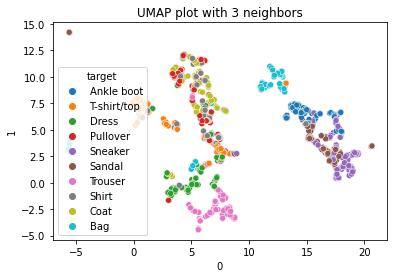

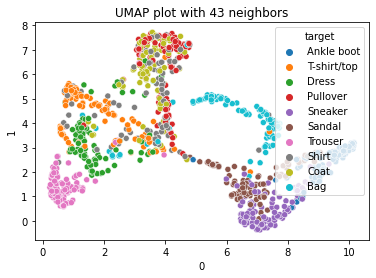

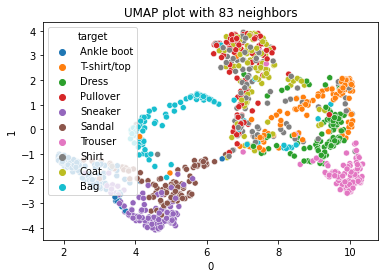

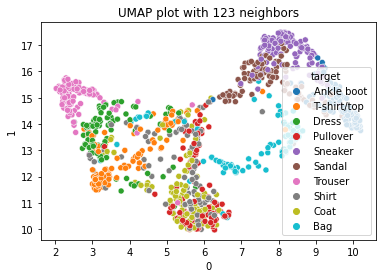

In [35]:
import umap

for n in range(3, 124, 40):
    # Run UMAP for each of these n_neighbors values and transform X_train_sub
    umap_model = umap.UMAP(n_neighbors=n, n_components=2)
    umap_components = pd.DataFrame(umap_model.fit_transform(X_train_sub), 
                                   columns=['0', '1'])
    umap_components['target'] = y_train_labels_sub

    # Plot reduced features in two dimensions using seaborn scatterplot
    sns.scatterplot(x='0', y='1', hue='target', data=umap_components)
    plt.title(f'UMAP plot with {n} neighbors')
    plt.show()
    

What have you observed? How would you be able to use these reduced features in further study?

The clusters were fairly similar between the two algorithms. Surprisingly, it seems that the TSNE model did about as well with preserving global structure as the UMAP models, based on the similarities between TSNE plots at different perplexities and the similarities between TSNE plots and the UMAP plots. Local structure varied significantly with changes in perplexity in the TSNE models. 

